In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('stud.csv')


In [3]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
y = df['math_score']

In [6]:
num_features= X.select_dtypes(exclude='object').columns
cat_features =X.select_dtypes(include='object').columns

In [7]:
num_transfrom = StandardScaler()
one_hotTrans = OneHotEncoder()

processor = ColumnTransformer(
    
    
    [("OneHotEncoder",OneHotEncoder(),cat_features),
     ("StandardScaler",StandardScaler(),num_features)
     ]
)

In [8]:
X = processor.fit_transform(X)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [10]:
x_train.shape,y_train.shape

((900, 19), (900,))

In [11]:
def eval_model(true,predicted):
    mae= mean_absolute_error(true,predicted)
    mse=mean_absolute_error(true,predicted)
    r2_square = r2_score(true,predicted)
    return mae,mse,r2_square


In [12]:
models = {
    "LinearRegression" : LinearRegression(),
    "lasso" : Lasso(),
    "Ridge" : Ridge(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" :RandomForestRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "KNeighborsRegressor" :KNeighborsRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    train_mae,train_mse,train_r2_square = eval_model(y_train,y_train_predict)
    test_mae,test_mse,test_r2_square = eval_model(y_test,y_test_predict)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_mse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2_square))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_mse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2_square))
    r2_list.append(test_r2_square)
    
    print('='*35)
    print('\n')

    

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 4.2968
- Mean Absolute Error: 4.2968
- R2 Score: 0.8723
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8344
- Mean Absolute Error: 3.8344
- R2 Score: 0.9063


lasso
Model performance for Training set
- Root Mean Squared Error: 5.2570
- Mean Absolute Error: 5.2570
- R2 Score: 0.8066
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.4386
- Mean Absolute Error: 4.4386
- R2 Score: 0.8611


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.2940
- Mean Absolute Error: 4.2940
- R2 Score: 0.8725
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8265
- Mean Absolute Error: 3.8265
- R2 Score: 0.9063


DecisionTreeRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0344
- Mean Absolute Error: 0.0344
- R2 Score: 0.9992
------------------------

RandomForestRegressor
Model performance for Training set
- Root Mean Squared Error: 1.8065
- Mean Absolute Error: 1.8065
- R2 Score: 0.9772
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6440
- Mean Absolute Error: 4.6440
- R2 Score: 0.8572


Learning rate set to 0.040267
0:	learn: 14.6413314	total: 149ms	remaining: 2m 29s
1:	learn: 14.2512887	total: 151ms	remaining: 1m 15s
2:	learn: 13.8699838	total: 153ms	remaining: 50.7s
3:	learn: 13.5462068	total: 154ms	remaining: 38.4s
4:	learn: 13.1910496	total: 155ms	remaining: 30.9s
5:	learn: 12.8654787	total: 156ms	remaining: 25.9s
6:	learn: 12.5745447	total: 157ms	remaining: 22.3s
7:	learn: 12.3579243	total: 158ms	remaining: 19.6s
8:	learn: 12.0368607	total: 159ms	remaining: 17.5s
9:	learn: 11.7527340	total: 160ms	remaining: 15.9s
10:	learn: 11.4770678	total: 162ms	remaining: 14.5s
11:	learn: 11.2065393	total: 163ms	remaining: 13.4s
12:	learn: 10.9456468	total: 165ms	remaining: 12.5s
13:	learn: 

In [13]:
df2 = pd.DataFrame(list(zip(model_list,r2_list)),columns=['modelName','R2_Squared']) 
df2.sort_values('R2_Squared',ascending=False)

,modelName,R2_Squared
2,Ridge,0.906288
0,LinearRegression,0.906276
5,CatBoostRegressor,0.872360
1,lasso,0.861107
4,RandomForestRegressor,0.857184
6,XGBRegressor,0.825055
7,KNeighborsRegressor,0.805122
3,DecisionTreeRegressor,0.699914


In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
print("model performence is %.2f"%r2_score(y_test,y_pred)*100)

model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91model performence is 0.91

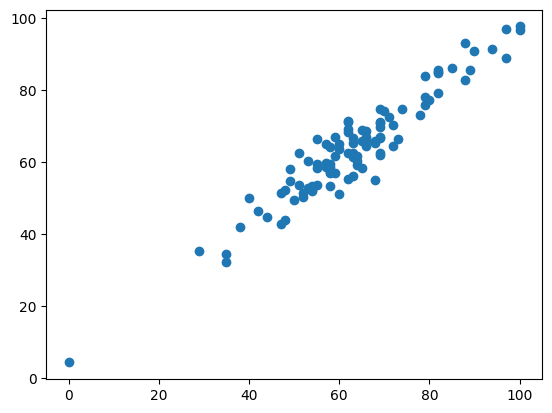

In [15]:
plt.scatter(y_test,y_pred)


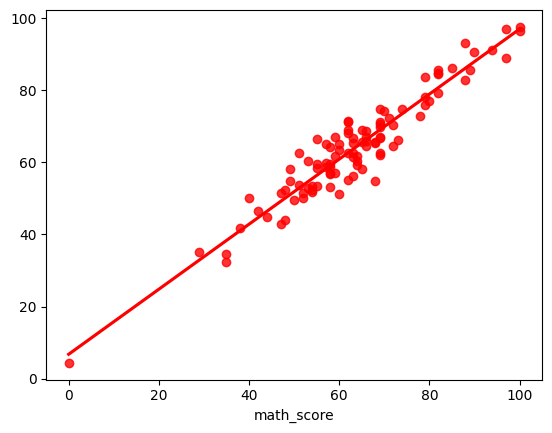

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');